# Machine Learning with Graph Neural Networks (GNNs)




## A graph neural network is a class of neural network for processing data best represented by graph data structures.

The Graph Data Structures are based on objects called **Nodes** (and or ***Vertices***) and their relationships called **edges**.

Each vertex or edge has:

* An ID that is unique across the graph
* A label that represents the type of object
* A set of properties that provide additional attributes.


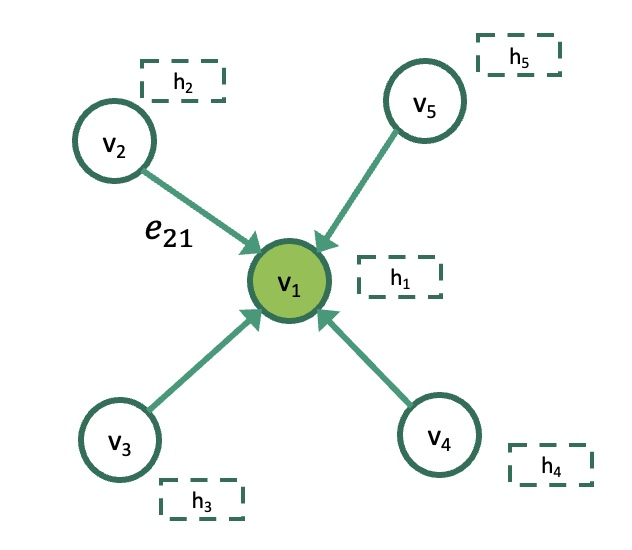

## Machine Learning using Graph Datatypes

Numerous real-world problems can be summarized as a set of tasks on graphs.

* Link prediction
* Node Classification
* Community Detection
* Ranking

Describe the DGL library and enter url than mention you are install it

In [2]:
# The OS module in Python provides functions for interacting with the operating system.

import os

In [17]:
# required env variables to use TensorFlow with DGL

os.environ['USE_OFFICIAL_TFDLPACK']='true'
os.environ['DGLBACKEND']='tensorflow'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [24]:
import pandas as pd
import numpy as np
import stellargraph as sg
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers, losses, metrics


In [32]:
import os
import pandas as pd

# Path to the folders containing the data
dyslexia_folder = "Data/Dyslexic"
control_folder = "Data/Control"

# Function to load data from folder
def load_data_from_folder(folder, label):
    data_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".csv"):
            data = pd.read_csv(os.path.join(folder, filename))
            # Assuming 'data' is your DataFrame
            data = data.drop(columns=['Unnamed: 0'])
            # Create a unique identifier for each patient based on CSV file name
            data["patient_id"] = filename.split(".")[0]  # Extract patient ID from filename
            data["label"] = label  # Add label column
            data_list.append(data)
    return data_list

D_data = load_data_from_folder(dyslexia_folder, "dyslexia")

# Load control samples
C_data = load_data_from_folder(control_folder, "control")


In [34]:
C_data[0]

,T,LX,LY,RX,RY,patient_id,label
0,0.0,0.00000,0.00000,0.00000,0.00000,111GM3,control
1,20.0,0.65535,-0.00001,0.65536,-0.65536,111GM3,control
2,40.0,0.65534,-0.00001,0.65536,-0.65536,111GM3,control
3,60.0,0.65534,-0.00001,0.65535,-0.65536,111GM3,control
4,80.0,0.65534,-0.00001,0.65534,0.00000,111GM3,control
...,...,...,...,...,...,...,...
1494,29880.0,103.54872,37.35520,104.85945,36.69984,111GM3,control
1495,29900.0,105.51480,36.04447,106.17018,32.76765,111GM3,control
1496,29920.0,107.48088,27.52472,108.79159,14.41743,111GM3,control
1497,29940.0,108.13612,-16.38473,102.89310,-78.64416,111GM3,control


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
import networkx as nx

def create_graph_from_data(data_tuple):
    data, _ = data_tuple  # Extract the DataFrame (data) from the tuple
    G = nx.Graph()
    
    # Add nodes (gaze coordinates) to the graph
    for index, row in data.iterrows():
        node_attrs = {'LX': row['LX'], 'LY': row['LY'], 'RX': row['RX'], 'RY': row['RY']}
        G.add_node(index, **node_attrs)
    
    # Add edges based on proximity (example: connecting consecutive gaze points)
    for i in range(len(data) - 1):
        G.add_edge(i, i+1)  # Connect consecutive nodes
    
    # Debugging statements
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())
    
    return G
C_data = [(df, None) for df in C_data]  # Create tuples with DataFrame and a placeholder value
D_data = [(df, None) for df in D_data]

# Now iterate over C_data and D_data to create graphs
C_graphs = [create_graph_from_data(data_tuple) for data_tuple in C_data]
D_graphs = [create_graph_from_data(data_tuple) for data_tuple in D_data]

Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1999
Number of edges: 1998
Number of nodes: 1249
Number of edges: 1248
Number of nodes: 1999
Number of edges: 1998
Number of nodes: 1249
Number of edges: 1248
Number of nodes: 1249
Number of edges: 1248
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1249
Number of edges: 1248
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1749
Number of edges: 1748
Number of nodes: 1249
Number of edges: 1248
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1999
Number of edges: 1998
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of edges: 1498
Number of nodes: 1499
Number of 

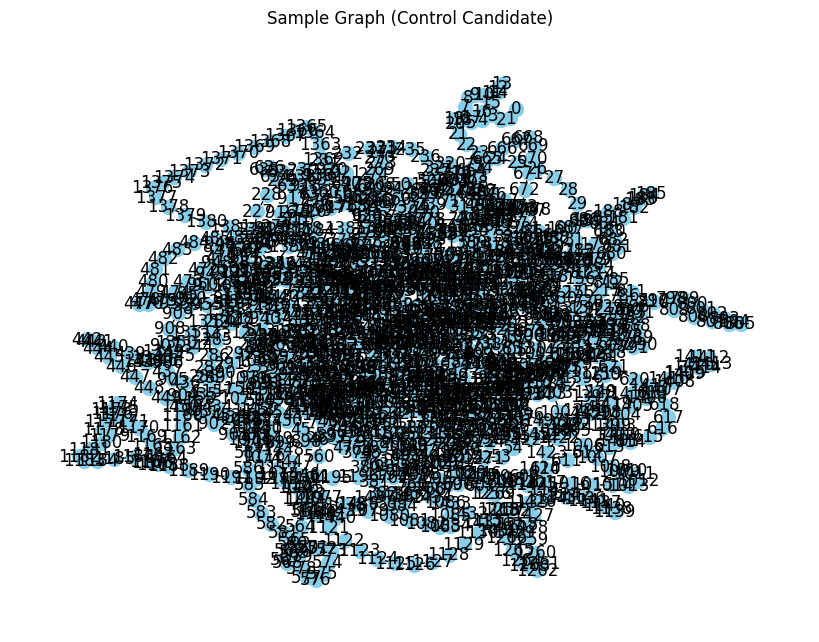

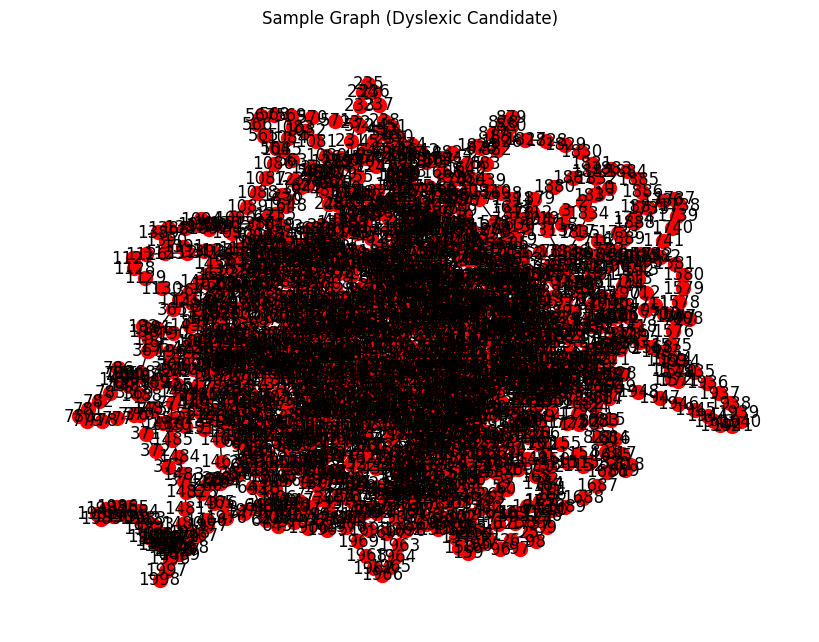

In [36]:
import matplotlib.pyplot as plt

# Visualize a sample graph from C_graphs
sample_graph = C_graphs[0]  # Select the first graph from C_graphs
plt.figure(figsize=(8, 6))
nx.draw(sample_graph, with_labels=True, node_size=100, node_color='skyblue')
plt.title("Sample Graph (Control Candidate)")
plt.show()

sample_graph = D_graphs[0]  # Select the first graph from C_graphs
plt.figure(figsize=(8, 6))
nx.draw(sample_graph, with_labels=True, node_size=100, node_color='red')
plt.title("Sample Graph (Dyslexic Candidate)")
plt.show()


In [13]:
# What does network nx do and why are we importing it

import networkx as nx

Query graph structures: printing out how many nodes and edges within the graph

NameError: name 'G' is not defined

In Graph representation the degree of a **Node** (*vertex*) of a graph is the number of **edges** that are incident to the **Node** (*vertex*)

In [ ]:
# get the in-degree of node 0, note node 0 and 33 are the club leaders (i.e. Mr. Hi and Officer)
g.in_degrees(33)

17

In Graph representation the successors are the outward / connected nodes represented by the degrees

In [ ]:
# get the successors of node 0
g.successors(0)

<tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31])>

It's generally best practices to Normalize the data in Tensorflow prior to training an ML model, Normalization represents numeric data with a range of 0 to 1, this improves performance and accuracy

In [ ]:
# normalizing the age value

age = (kc_nodes_data['Age'] / 100).to_numpy()

In [ ]:
# confirming normalization by viewing top 5 results

age[:5]

array([0.45, 0.33, 0.36, 0.31, 0.41])

In [ ]:
# checking the datatype...why???

age.dtype

dtype('float64')

In [ ]:
# casting datatype why???

age = tf.cast(age, tf.int64)

In [ ]:
# confirming data type

age.dtype

tf.int64

> 🔑 ***An observation I noticed is when feeding data to the graph (i.e. g.ndata) datatype (dype) must be of `tf.int64` vs. tensorflow's `float32` dtype, therefore i casted to int64.

In [ ]:
# Feed the features to graph
g.ndata['Club'] = age
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Club': Scheme(shape=(), dtype=tf.int64)}
      edata_schemes={})


In [ ]:
# The "Club" column represents which community does each node belong to.
# The values are of string type, so we must convert it to either categorical
# integer values or one-hot encoding.

club = kc_nodes_data['Club'].to_list()
# Convert to categorical integer values with 0 for 'Mr. Hi', 1 for 'Officer'.
club = tf.constant([c == 'Officer' for c in club], dtype=tf.int64)
# We can also convert it to one-hot encoding.
club_onehot = tf.one_hot(club, np.max(club)+1)
print(club_onehot)

# Use `g.ndata` like a normal dictionary
g.ndata.update({'club' : club, 'club_onehot' : club_onehot})
# Remove some features using del
# del g.ndata['age']

print(g)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(34, 2), dtype=float32)
Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Club': Scheme(shape=(), dtype=tf.int64), 'club': Scheme(shape=(), dtype=tf.int64), 'club_onehot': Scheme(shape=(2,), dtype=tf.float32)}
      edata_schemes={})


In [ ]:
# Returns the node feature schemes for the specified type. The scheme of a feature describes the shape and data type of it.

g.node_attr_schemes

<bound method DGLHeteroGraph.node_attr_schemes of Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Club': Scheme(shape=(), dtype=tf.int64), 'club': Scheme(shape=(), dtype=tf.int64), 'club_onehot': Scheme(shape=(2,), dtype=tf.float32)}
      edata_schemes={})>

In [ ]:
#Return the edge feature schemes for the specified type.  The scheme of a feature describes the shape and data type of it.

g.edge_attr_schemes

<bound method DGLHeteroGraph.edge_attr_schemes of Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Club': Scheme(shape=(), dtype=tf.int64), 'club': Scheme(shape=(), dtype=tf.int64), 'club_onehot': Scheme(shape=(2,), dtype=tf.float32)}
      edata_schemes={})>

In [ ]:
# Get edge features from the DataFrame and feed it to graph.
edge_weight = kc_edges_data['Weight'].to_numpy()

edge_weight = tf.cast(edge_weight, tf.int64)
# Similarly, use `g.edata` for getting/setting edge features.
g.edata['weight'] = edge_weight
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'Club': Scheme(shape=(), dtype=tf.int64), 'club': Scheme(shape=(), dtype=tf.int64), 'club_onehot': Scheme(shape=(2,), dtype=tf.float32)}
      edata_schemes={'weight': Scheme(shape=(), dtype=tf.int64)})


In [ ]:
#itertools is used to iterate over data structures that can be stepped over using a for-loop

import itertools

In [ ]:
g.number_of_nodes()

34

In [ ]:
# Defining the node features
# set the initial random weights of Keras layers, takes in number of nodes, provides 5 random weights as features in a 

node_embed = tf.keras.layers.Embedding(g.number_of_nodes(), 5, embeddings_initializer='glorot_uniform')


node_embed(1) # initialize embedding layer
inputs = node_embed.embeddings
print(inputs)

<tf.Variable 'embedding/embeddings:0' shape=(34, 5) dtype=float32, numpy=
array([[ 3.24112475e-02, -1.02799952e-01,  2.28330702e-01,
         9.42149460e-02, -1.60016641e-01],
       [-3.24511081e-01, -2.16557488e-01,  4.01924849e-02,
         3.30127090e-01,  6.18136227e-02],
       [ 2.01782614e-01, -1.98580921e-01,  2.71398395e-01,
        -1.26206696e-01,  2.82920152e-01],
       [ 2.97312766e-01,  1.21241421e-01,  6.19913042e-02,
        -1.50173858e-01, -1.93126440e-01],
       [-2.78383851e-01, -4.85754013e-02, -8.06594193e-02,
        -1.50519773e-01, -1.12466663e-01],
       [ 2.86902517e-01,  3.16637903e-01, -1.62899196e-02,
         3.82837802e-01,  2.85298198e-01],
       [-3.03515643e-01,  2.33739167e-01,  2.01424450e-01,
        -3.11837494e-02,  3.70147198e-01],
       [ 3.87769789e-01,  1.22955233e-01,  2.86674500e-02,
         2.93427020e-01, -2.09283680e-01],
       [ 3.21322948e-01, -2.12129951e-03,  2.01263219e-01,
         2.95663327e-01, -2.76436001e-01],
       [

In [ ]:
# based on above embeddings we have a tensor representation of 34 nodes with 5 features (i.e. weights per node)

inputs.shape

TensorShape([34, 5])

The community label is stored in the **club** node, feature 0 represents "Mr. Hi" and feature 1 represents "Officer".  Only nodes 0 and 33 are labeled

In [ ]:
labels = g.ndata['club']
labeled_nodes = [0, 33]
print('Labels', tf.gather(labels, labeled_nodes))

Labels tf.Tensor([0 1], shape=(2,), dtype=int64)


In [41]:
from dgl.nn import SAGEConv

# build a two-layer GraphSAGE model
class GraphSAGE(tf.keras.layers.Layer):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, num_classes, 'mean')
    
    def call(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = tf.nn.relu(h)
        h = self.conv2(g, h)
        return h
    
# Dimensions: 5 node embeddings, 16 units in the hidden layers and an output layer dimension: 2, the two classes, 0 and 1
net = GraphSAGE(5, 16, 2)

NameError: name 'tf' is not defined

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fcn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(100):
    
    with tf.GradientTape() as tape:
        tape.watch(inputs) # optimize embedding layer also
        
        # forward
        logits = net(g, inputs)

        # compute loss
        loss = loss_fcn(tf.gather(labels, labeled_nodes), 
                        tf.gather(logits, labeled_nodes))

        # backward
        grads = tape.gradient(loss, net.trainable_weights + node_embed.trainable_weights)        
        optimizer.apply_gradients(zip(grads, net.trainable_weights + node_embed.trainable_weights))
        all_logits.append(logits.numpy())
    
    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

In [ ]:
# ----------- 5. check results ------------------------ #
pred = tf.argmax(logits, axis=1).numpy()
print('Accuracy', (pred == labels.numpy()).sum().item() / len(pred))

Accuracy 0.9411764705882353


Printing `Classification report` along with `labeled data` vs. `pred data` graphs

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.88      0.94        17

    accuracy                           0.94        34
   macro avg       0.95      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34



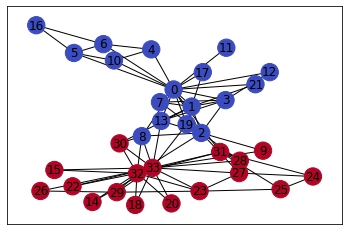

In [ ]:
# print graph with true labels

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=labels, cmap="coolwarm")

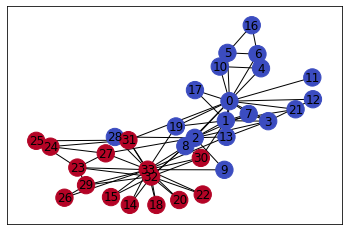

In [ ]:
# print graph with predicted labels

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=pred, cmap="coolwarm")

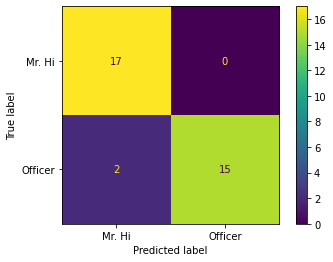

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Mr. Hi','Officer'])
cmd.plot();

In [ ]:
import pandas as pd
import networkx as nx
from stellargraph import StellarGraph

# Assuming you have a DataFrame named all_data containing your data
# It should have columns: T, LX, LY, RX, RY, patient_id, and label

# Select 5 dyslexia patients and 5 control patients with different patient IDs
dyslexia_patients = all_data[all_data["label"] == "dyslexia"]["patient_id"].unique()[:1]
control_patients = all_data[all_data["label"] == "control"]["patient_id"].unique()[:1]

selected_patients = pd.concat([
    all_data[all_data["patient_id"].isin(dyslexia_patients)],
    all_data[all_data["patient_id"].isin(control_patients)]
])

# First, create a graph
graph = nx.Graph()

# Add nodes to the graph
for idx, row in selected_patients.iterrows():
    patient_id = row["patient_id"]
    # Add node with attributes T, LX, LY, RX, RY
    if patient_id not in graph.nodes():  # Add node only if not already present
        graph.add_node(patient_id, T=row["T"], LX=row["LX"], LY=row["LY"], RX=row["RX"], RY=row["RY"])

# Define the criteria for creating edges (example: based on label)
# Here, we'll connect nodes with the same label (e.g., dyslexia or control)
for label in selected_patients["label"].unique():
    label_data = selected_patients[selected_patients["label"] == label]
    for idx1, row1 in label_data.iterrows():
        for idx2, row2 in label_data.iterrows():
            if idx1 != idx2:  # Avoid self-loops
                graph.add_edge(row1["patient_id"], row2["patient_id"])

# Create a StellarGraph object from the NetworkX graph
stellar_graph = StellarGraph(graph)

# Now you can perform graph-based analyses using the stellar_graph object
# For example, you can generate node embeddings using graph embedding algorithms
